# **IMPORTS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 # معالجة الصور والفيديو
import numpy as np #مكتبة للعمليات الرياضية
from PIL import Image # التعامل مع الصور
import matplotlib.pyplot as plt # للرسم

# **Load Image (Pillow)**

(np.float64(-0.5), np.float64(769.5), np.float64(449.5), np.float64(-0.5))

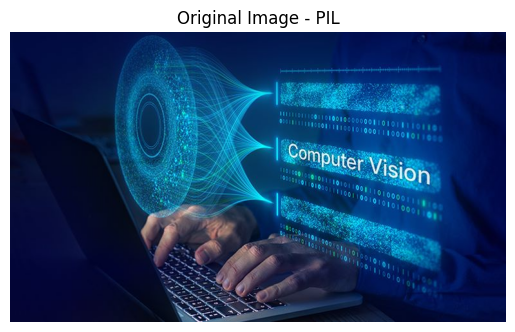

In [ ]:
img_pil = Image.open("/content/rola&menna.jpeg")
plt.imshow(img_pil)
plt.title("Original Image - PIL")
plt.axis("off")

**Load Image (OpenCV)**

(np.float64(-0.5), np.float64(769.5), np.float64(449.5), np.float64(-0.5))

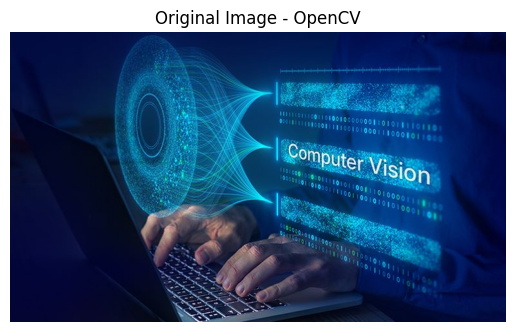

In [ ]:
img_cv = cv2.imread("/content/rola&menna.jpeg")
img_cv_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB) #بنحول الصورة

plt.imshow(img_cv_rgb)
plt.title("Original Image - OpenCV")
plt.axis("off")


# **Resize**

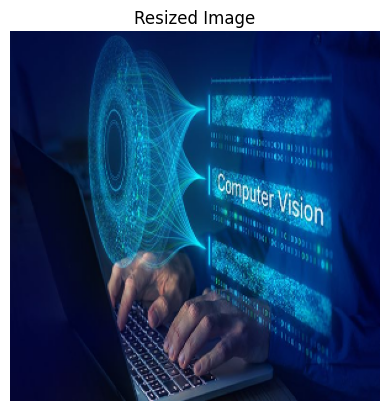

In [ ]:
import os #مكتبة للفولدرات
os.makedirs("data/processed/resized", exist_ok=True) #بنعمل فولدر
resized = cv2.resize(img_cv, (300, 300))
cv2.imwrite("data/processed/resized/img_resized.jpg", resized)

plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title("Resized Image")
plt.axis("off")
plt.show()


# **Rotate**

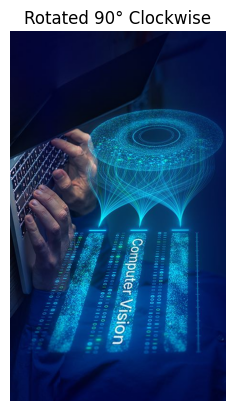

In [ ]:
os.makedirs("data/processed/rotated", exist_ok=True)

rotated = cv2.rotate(img_cv, cv2.ROTATE_90_CLOCKWISE)
cv2.imwrite("data/processed/rotated/img_rotated.jpg", rotated)


plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title("Rotated 90° Clockwise")
plt.axis("off")
plt.show()


# **Save Different Formats**

In [ ]:
cv2.imwrite("data/processed/img.jpg", img_cv)
cv2.imwrite("data/processed/img.png", img_cv)

True

# Draw Red Square

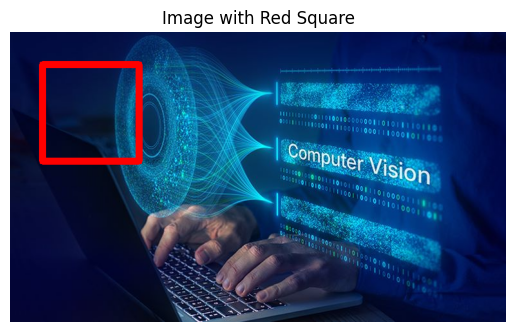

In [ ]:
os.makedirs("data/processed/square", exist_ok=True)

img_square = img_cv.copy()

# رسم مربع أحمر
cv2.rectangle(
    img_square,
    (50, 50),      # النقطة الأولى (x1, y1)
    (200, 200),    # النقطة الثانية (x2, y2)
    (0, 0, 255),   # اللون الأحمر (BGR)
  10            # سمك الخط
)

# حفظ الصورة
cv2.imwrite("data/processed/square/img_square.jpg", img_square)

# عرض الصورة
plt.imshow(cv2.cvtColor(img_square, cv2.COLOR_BGR2RGB))
plt.title("Image with Red Square")
plt.axis("off")
plt.show()


# **Invert Colors**

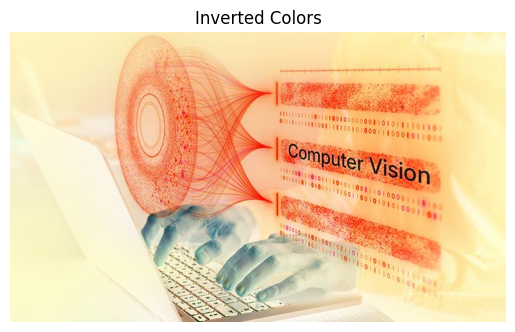

In [ ]:
os.makedirs("data/processed/inverted", exist_ok=True)

inverted = cv2.bitwise_not(img_cv) # 255- old pixel

cv2.imwrite("data/processed/inverted/img_inverted.jpg", inverted)

plt.imshow(cv2.cvtColor(inverted, cv2.COLOR_BGR2RGB))
plt.title("Inverted Colors")
plt.axis("off")
plt.show()



# **Draw Stripes**

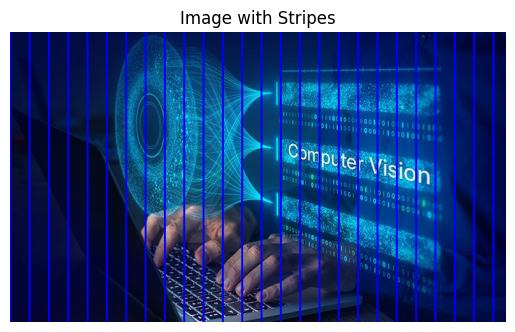

In [ ]:
os.makedirs("data/processed/stripes", exist_ok=True)

stripes = img_cv.copy()

for i in range(0, stripes.shape[1], 30):  # نبدأ من x = 0 نتحرك كل 30 بكسل
    cv2.line( # cv2.line(image, pt1, pt2, color, thickness)
        stripes,
        (i, 0),
        (i, stripes.shape[0]),
        (255, 0, 0),
        2
    )

cv2.imwrite("data/processed/stripes/img_stripes.jpg", stripes)

plt.imshow(cv2.cvtColor(stripes, cv2.COLOR_BGR2RGB))
plt.title("Image with Stripes")
plt.axis("off")
plt.show()


# **Grayscale**

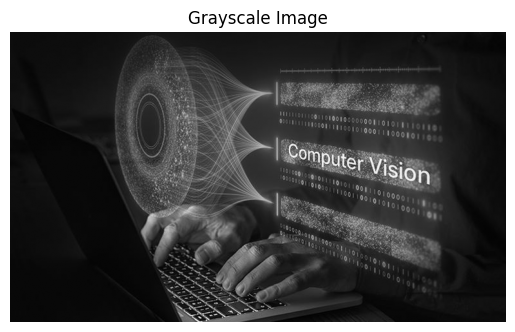

In [ ]:
os.makedirs("data/processed/grayscale", exist_ok=True)

gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

cv2.imwrite("data/processed/grayscale/img_gray.jpg", gray)

plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


# **Histogram**

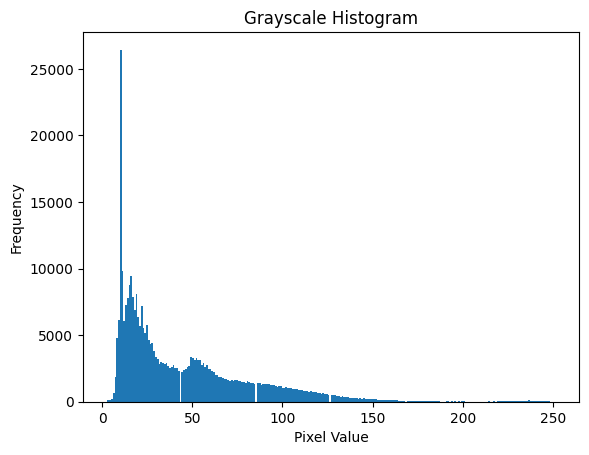

In [ ]:
plt.hist(gray.ravel(), bins=256) # عدد الاعمدة
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


# Implement a Convolution Function from **Scratch**

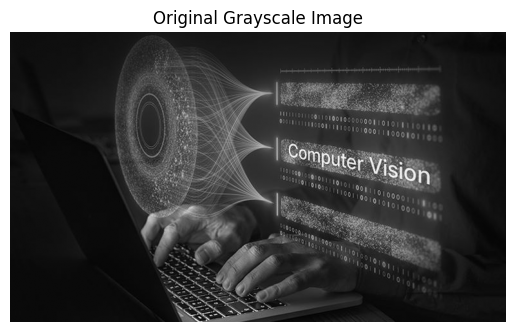

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import sliding_window_view

# Load image in grayscale
img = cv2.imread("/content/rola&menna.jpeg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

def convolution(image, kernel):
    k_h, k_w = kernel.shape

    # Padding
    padded_image = np.pad(
        image,
        ((k_h//2, k_h//2), (k_w//2, k_w//2)),
        mode="constant"
    )

    # Sliding windows
    windows = sliding_window_view(padded_image, (k_h, k_w))

    # Convolution operation
    output = np.tensordot(
        windows,
        kernel,
        axes=((2, 3), (0, 1))
    )

    return output


# Apply Mean Filter **(Blurring)**

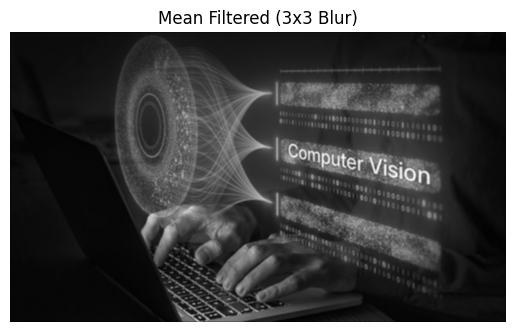

In [ ]:
# Mean filter kernel (3x3)
mean_kernel = np.ones((3, 3), np.float32) / 9

mean_filtered = convolution(gray, mean_kernel)

plt.imshow(mean_filtered, cmap="gray")
plt.title("Mean Filtered (3x3 Blur)")
plt.axis("off")
plt.show()


# Apply Gaussian Filter **(Noise Reduction)**

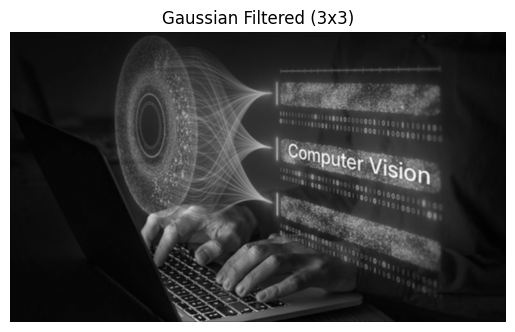

In [ ]:
# Gaussian kernel (3x3)
gaussian_kernel = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32)

gaussian_filtered = convolution(gray, gaussian_kernel)

plt.imshow(gaussian_filtered, cmap="gray")
plt.title("Gaussian Filtered (3x3)")
plt.axis("off")
plt.show()


# Apply Sobel Filter **(Edge Detection)**

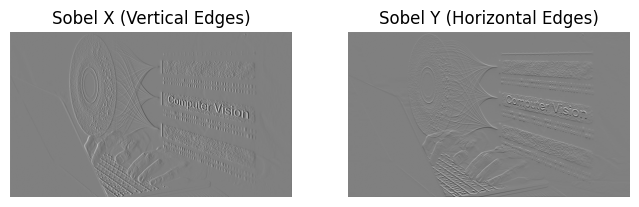

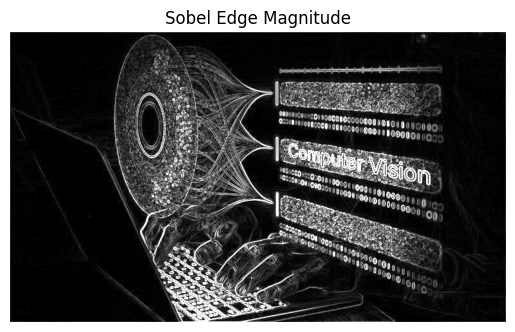

In [ ]:
# Sobel kernels
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

# Apply Sobel filters using our convolution function
edge_x = convolution(gray, sobel_x)
edge_y = convolution(gray, sobel_y)

# Combine edges (gradient magnitude)
sobel_edges = np.sqrt(edge_x**2 + edge_y**2)
sobel_edges = np.clip(sobel_edges, 0, 255).astype(np.uint8)

# Display Sobel X and Y
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(edge_x, cmap="gray")
plt.title("Sobel X (Vertical Edges)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edge_y, cmap="gray")
plt.title("Sobel Y (Horizontal Edges)")
plt.axis("off")

plt.show()

# Display final edge magnitude
plt.imshow(sobel_edges, cmap="gray")
plt.title("Sobel Edge Magnitude")
plt.axis("off")
plt.show()


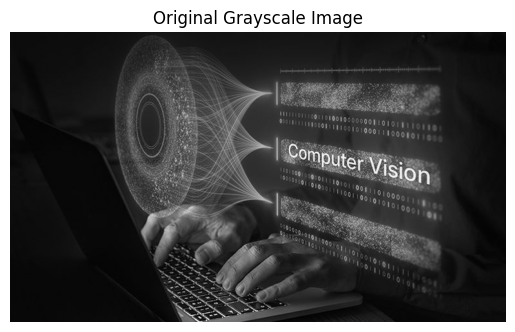

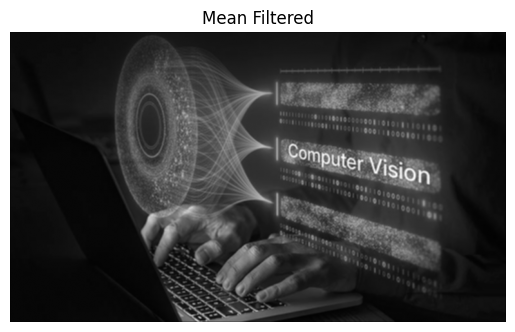

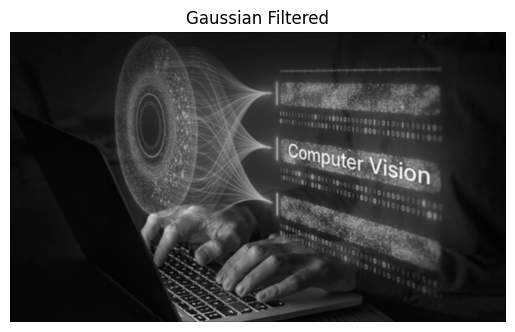

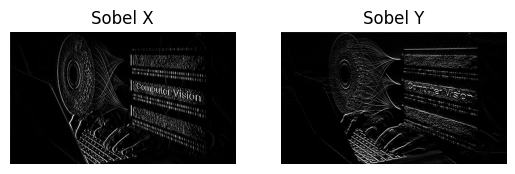

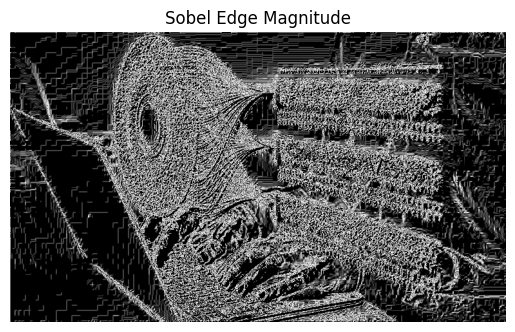

In [ ]:
# Load image in grayscale using Pillow
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open("/content/rola&menna.jpeg").convert("L")
gray = np.array(img, dtype=np.uint8)

plt.imshow(gray, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

# Convolution function from scratch
def convolve(image, kernel):
    kh, kw = kernel.shape
    pad_h = kh // 2
    pad_w = kw // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    output = np.zeros_like(image, dtype=float)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kh, j:j+kw]
            output[i,j] = np.sum(region * kernel)

    output = np.clip(output, 0, 255)
    return output.astype(np.uint8)

# Apply Mean Filter (3x3)
mean_kernel = np.ones((3,3), dtype=np.float32) / 9
mean_filtered = convolve(gray, mean_kernel)

plt.imshow(mean_filtered, cmap="gray")
plt.title("Mean Filtered")
plt.axis("off")
plt.show()

# Apply Gaussian Filter (3x3)
gaussian_kernel = np.array([[1,2,1],
                            [2,4,2],
                            [1,2,1]], dtype=np.float32) / 16
gaussian_filtered = convolve(gray, gaussian_kernel)

plt.imshow(gaussian_filtered, cmap="gray")
plt.title("Gaussian Filtered")
plt.axis("off")
plt.show()

# Sobel Edge Detection
sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]], dtype=np.float32)

sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]], dtype=np.float32)

edge_x = convolve(gray, sobel_x)
edge_y = convolve(gray, sobel_y)

sobel_edges = np.sqrt(edge_x**2 + edge_y**2)
sobel_edges = np.clip(sobel_edges, 0, 255).astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(edge_x, cmap="gray")
plt.title("Sobel X")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edge_y, cmap="gray")
plt.title("Sobel Y")
plt.axis("off")
plt.show()

plt.imshow(sobel_edges, cmap="gray")
plt.title("Sobel Edge Magnitude")
plt.axis("off")
plt.show()


## **Resize images**

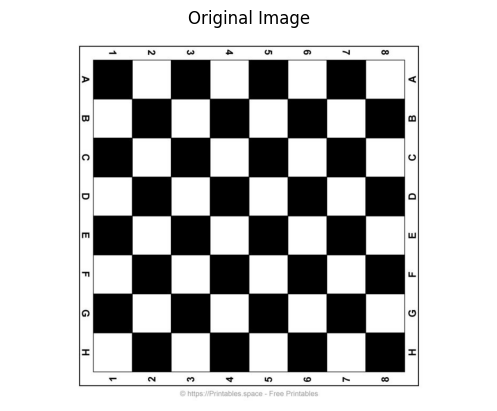

Original size: 900 x 696


In [ ]:
img = cv2.imread('/content/aisha.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis("off")
plt.show()
height, width = img.shape[:2]
print("Original size:", width, "x", height)


# Half


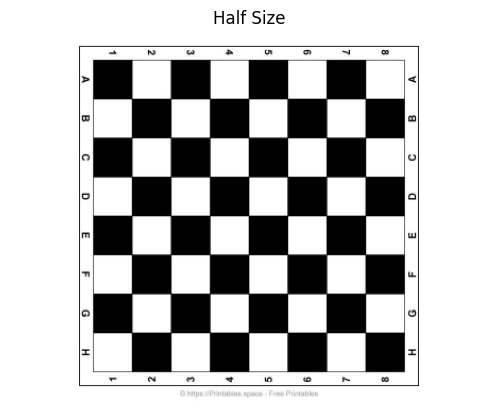

In [ ]:
half = cv2.resize(img, (width // 2, height // 2))
plt.imshow(cv2.cvtColor(half, cv2.COLOR_BGR2RGB))
plt.title('Half Size')
plt.axis("off")
plt.show()


#Double

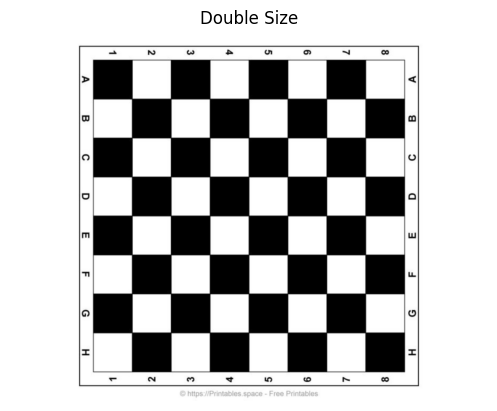

In [ ]:
double = cv2.resize(img, (width * 2, height * 2))
plt.imshow(cv2.cvtColor(double, cv2.COLOR_BGR2RGB))
plt.title('Double Size')
plt.axis("off")
plt.show()


# 200×200

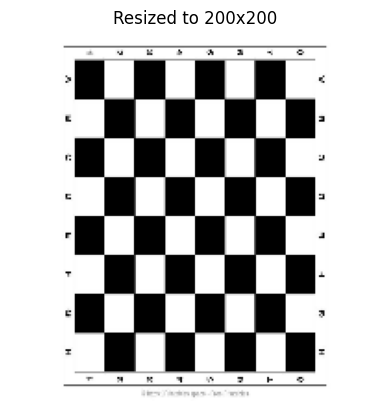

In [ ]:
fixed = cv2.resize(img, (200, 200))
plt.imshow(cv2.cvtColor(fixed, cv2.COLOR_BGR2RGB))
plt.title('Resized to 200x200')
plt.axis("off")
plt.show()

# Using interpolation methods: NEAREST, LINEAR, CUBIC, AREA

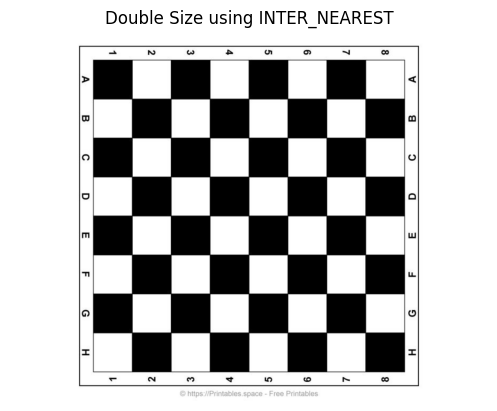

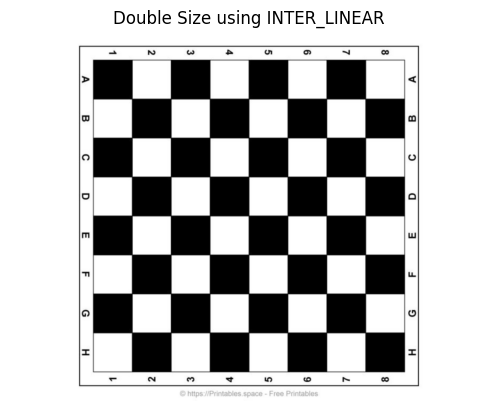

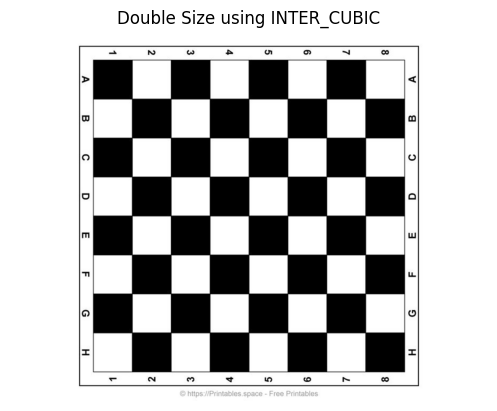

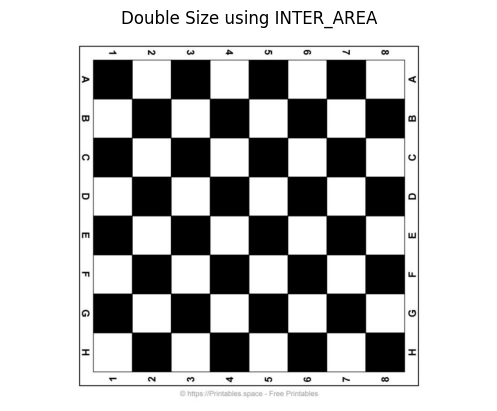

In [ ]:
methods = {
    "INTER_NEAREST": cv2.INTER_NEAREST,
    "INTER_LINEAR": cv2.INTER_LINEAR,
    "INTER_CUBIC": cv2.INTER_CUBIC,
    "INTER_AREA": cv2.INTER_AREA
}

for name, method in methods.items():
    resized = cv2.resize(img, (width * 2, height * 2), interpolation=method)
    plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    plt.title(f"Double Size using {name}")
    plt.axis("off")
    plt.show()

# **Harris Corner Detector**

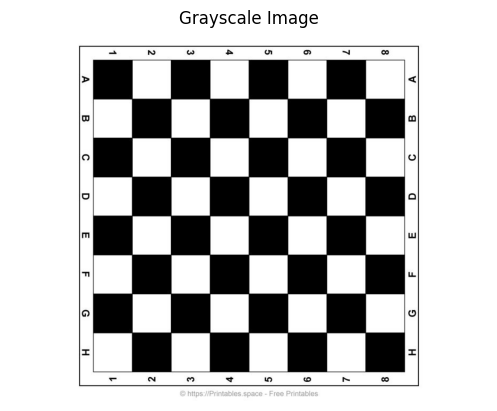

In [ ]:
# 1. Load an image (e.g., a building or chessboard) and convert it to grayscale
img = cv2.imread('/content/printable-chess-board-900x696.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis("off")
plt.show()

In [ ]:
# 2. Apply Harris Corner Detector
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

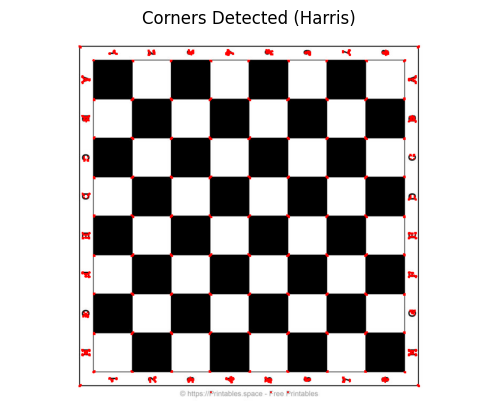

In [ ]:
dst = cv2.dilate(dst, None)
img[dst > 0.01 * dst.max()] = [0, 0, 255]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Corners Detected (Harris)')
plt.axis("off")
plt.show()

# Compare number of corners detected in original vs scaled images

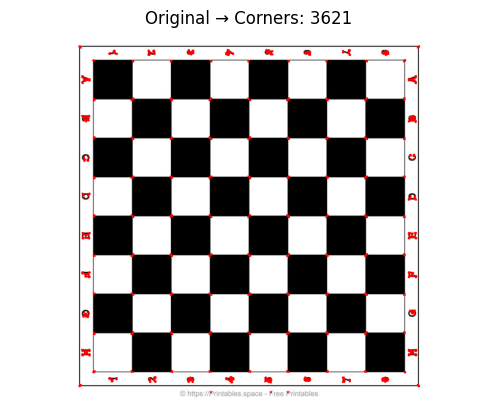

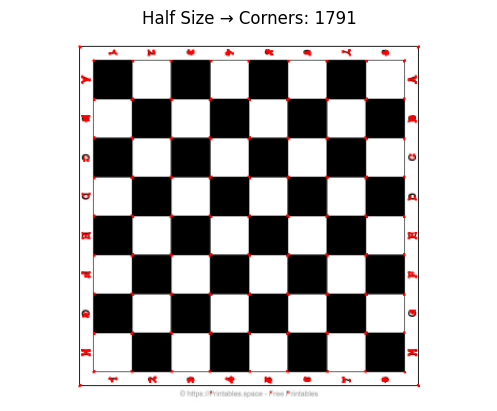

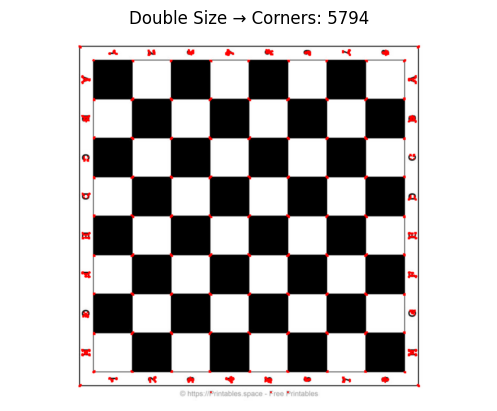

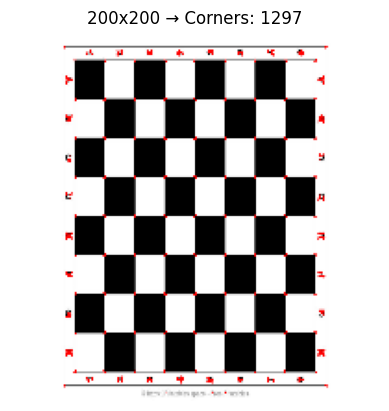

In [ ]:
def count_corners(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    return np.sum(dst > 0.01 * dst.max())
images = {
    "Original": img,
    "Half Size": cv2.resize(img, (width//2, height//2)),
    "Double Size": cv2.resize(img, (width*2, height*2)),
    "200x200": cv2.resize(img, (200, 200))
}
for name, image in images.items():
    corners = count_corners(image)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"{name} \u2192 Corners: {corners}")
    plt.axis("off")
    plt.show()

# **Image Segmentation Specialist**

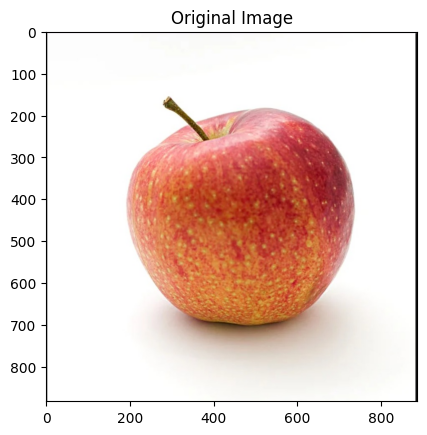

In [ ]:
import cv2
import matplotlib.pyplot as plt
image_path = "/content/nada.jpeg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Original Image")
plt.show()

# **Otsu Thresholding**

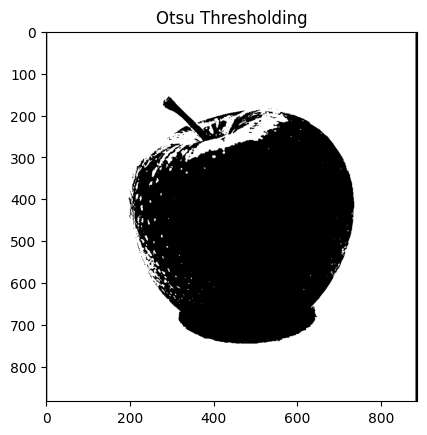

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

_, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(otsu, cmap='gray')
plt.title("Otsu Thresholding")
plt.show()


# **K-Means Segmentation (Lab Color Space, K=4)**

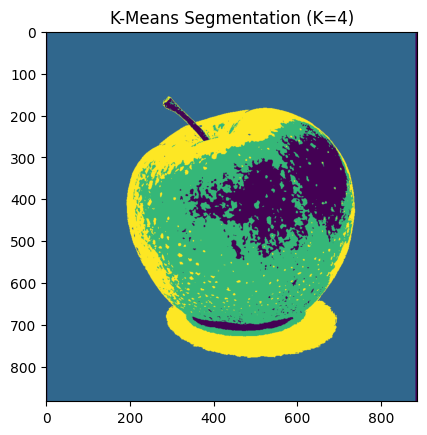

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
lab_reshaped = lab.reshape((-1, 3))

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(lab_reshaped)
labels = kmeans.labels_
segmented = labels.reshape(img.shape[:2])

plt.imshow(segmented, cmap='viridis')
plt.title("K-Means Segmentation (K=4)")
plt.show()


# **GrabCut Segmentation**

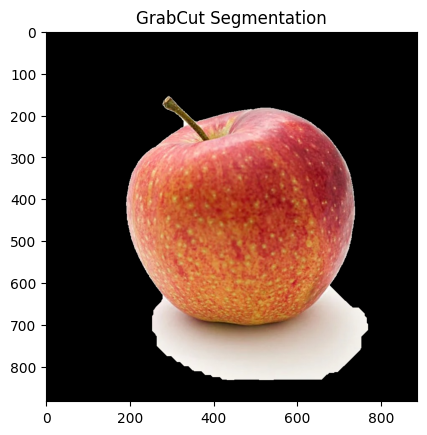

In [ ]:

mask = np.zeros(img.shape[:2], np.uint8)


rect = (50, 50, img.shape[1]-100, img.shape[0]-100)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
grabcut = img * mask2[:, :, np.newaxis]

plt.imshow(grabcut)
plt.title("GrabCut Segmentation")
plt.show()


# **Compare Segmentation Results**

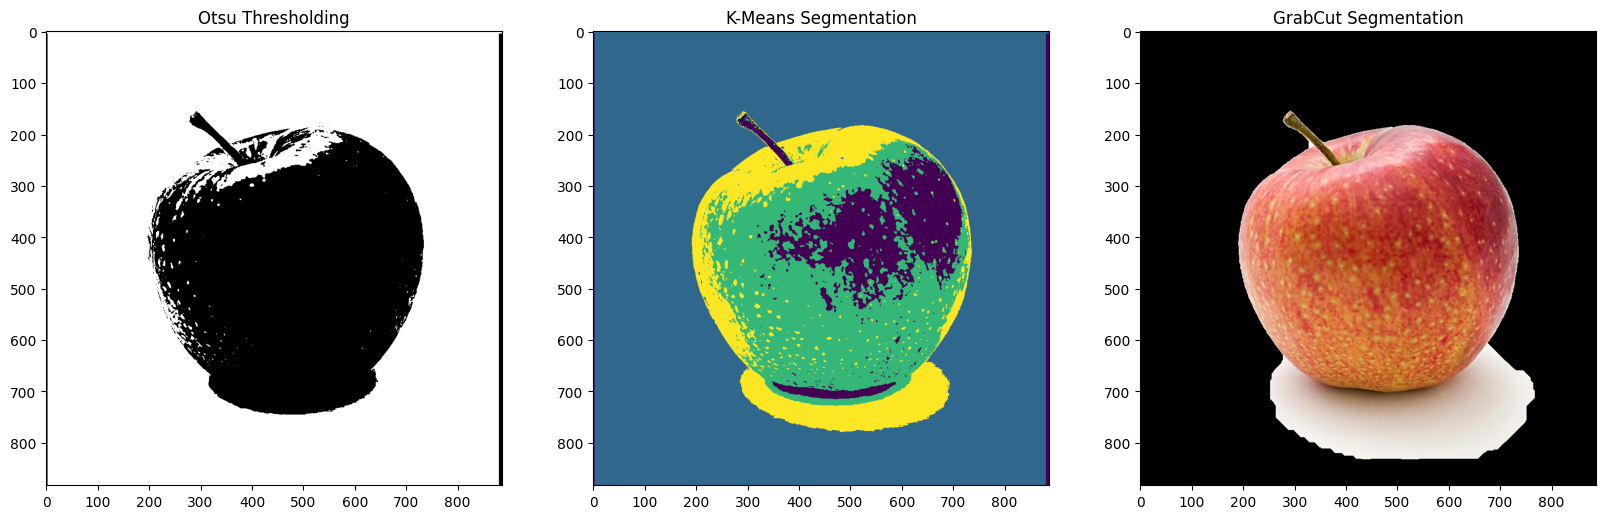

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,8))
axes[0].imshow(otsu, cmap='gray')
axes[0].set_title("Otsu Thresholding")
axes[1].imshow(segmented, cmap='viridis')
axes[1].set_title("K-Means Segmentation")
axes[2].imshow(grabcut)
axes[2].set_title("GrabCut Segmentation")
plt.show()


# **Save Segmented Images**

In [ ]:
cv2.imwrite("otsu.png", otsu)
cv2.imwrite("kmeans.png", cv2.cvtColor(segmented.astype(np.uint8), cv2.COLOR_RGB2BGR))
cv2.imwrite("grabcut.png", cv2.cvtColor(grabcut, cv2.COLOR_RGB2BGR))


True

# Deep Learning: CNN Training and MLP Comparison

In [ ]:
import os
print(os.listdir("/content"))


['.config', 'aisha.jpeg', 'data', 'nada.jpeg', 'grabcut.png', 'otsu.png', 'drive', 'rola&menna.jpeg', 'kmeans.png', 'sample_data']


In [ ]:
import zipfile, os

zip_path = "/content/part5_data.zip"
extract_dir = "/content/part5_data_extracted"

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)

print("Extracted to:", extract_dir)
print("Top-level:", os.listdir(extract_dir)[:10])




Extracted to: /content/part5_data_extracted
Top-level: ['part5_data']


In [ ]:
import zipfile, os

zip_path = "/content/part5_data.zip"
with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall("/content")

print(" Unzipped!")
print("Now /content:", os.listdir("/content"))

DATA_DIR = "/content/part5_data"
print(os.listdir(DATA_DIR))




 Unzipped!
Now /content: ['.config', 'part5_data_extracted', 'part5_data', 'part5_data.zip', 'sample_data']
['apple fruit', 'orange fruit', 'banana fruit']


In [ ]:
from PIL import Image
import os
from pathlib import Path

input_root = Path("/content/part5_data_extracted")
output_root = Path("/content/part5_data_jpeg")
output_root.mkdir(parents=True, exist_ok=True)

img_exts = {".png", ".jpg", ".jpeg", ".bmp", ".webp"}

converted = 0
skipped = 0

for in_path in input_root.rglob("*"):
    if in_path.is_dir():
        continue

    ext = in_path.suffix.lower()
    rel = in_path.relative_to(input_root)


    if ext not in img_exts:
        out_path = output_root / rel
        out_path.parent.mkdir(parents=True, exist_ok=True)

        out_path.write_bytes(in_path.read_bytes())
        continue


    out_path = (output_root / rel).with_suffix(".jpg")
    out_path.parent.mkdir(parents=True, exist_ok=True)

    try:
        img = Image.open(in_path)


        if img.mode in ("RGBA", "LA") or ("transparency" in img.info):
            bg = Image.new("RGB", img.size, (255, 255, 255))
            bg.paste(img.convert("RGBA"), mask=img.convert("RGBA").split()[-1])
            img_rgb = bg
        else:
            img_rgb = img.convert("RGB")


        img_rgb.save(out_path, format="JPEG", quality=95, optimize=True)
        converted += 1

    except Exception as e:
        skipped += 1
        print("Skipped:", in_path, "| Reason:", e)

print(f"✅ Converted: {converted} images")
print(f"⚠️ Skipped: {skipped} files")
print("Output folder:", output_root)


✅ Converted: 120 images
⚠️ Skipped: 0 files
Output folder: /content/part5_data_jpeg


# Load dataset (Train/Val)

In [ ]:
import tensorflow as tf

IMG_SIZE = (32, 32)
BATCH_SIZE = 32
SEED = 42

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)

print(" Classes:", class_names)
print(" Num classes:", num_classes)


Found 120 files belonging to 3 classes.
Using 96 files for training.
Found 120 files belonging to 3 classes.
Using 24 files for validation.
 Classes: ['apple fruit', 'banana fruit', 'orange fruit']
 Num classes: 3


# Show sample images

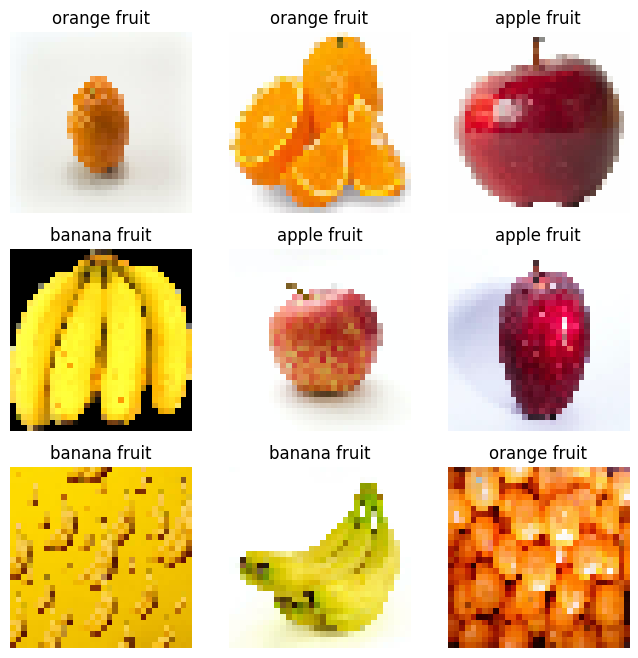

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for images, labels in train_ds.take(1):
    for i in range(min(9, images.shape[0])):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


# Normalize + performance

In [ ]:
import tensorflow as tf
AUTOTUNE = tf.data.AUTOTUNE

def normalize(img, label):
    img = tf.cast(img, tf.float32) / 255.0
    return img, label

train_ds_n = train_ds.map(normalize).cache().shuffle(1000, seed=SEED).prefetch(AUTOTUNE)
val_ds_n   = val_ds.map(normalize).cache().prefetch(AUTOTUNE)


# CNN

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.08),
    tf.keras.layers.RandomZoom(0.1),
])

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    data_augmentation,

    tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

cnn_model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,795 (1.07 MB)

 Trainable params: 281,795 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

# Train and Evaluate CNN

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)
]

history_cnn = cnn_model.fit(
    train_ds_n,
    validation_data=val_ds_n,
    epochs=20,
    callbacks=callbacks
)


cnn_val_loss, cnn_val_acc = cnn_model.evaluate(val_ds_n, verbose=0)
print(f" CNN Val Accuracy: {cnn_val_acc:.4f}")


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 650ms/step - accuracy: 0.3333 - loss: 1.1612 - val_accuracy: 0.3333 - val_loss: 1.0729
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4557 - loss: 1.0412 - val_accuracy: 0.5000 - val_loss: 1.0066
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6628 - loss: 0.9549 - val_accuracy: 0.4583 - val_loss: 0.9293
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6797 - loss: 0.8544 - val_accuracy: 0.5833 - val_loss: 0.8346
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8346 - loss: 0.7399 - val_accuracy: 0.6250 - val_loss: 0.7696
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8294 - loss: 0.6440 - val_accuracy: 0.6250 - val_loss: 0.7163
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7409 - loss: 0.6741 - val_accuracy: 0.6250 - val_loss: 0.7940
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7773 - loss: 0.6297 - val_accuracy: 0.7917 - val_loss: 0.6129

# MLP + Compare

In [ ]:
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

mlp_model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

history_mlp = mlp_model.fit(
    train_ds_n,
    validation_data=val_ds_n,
    epochs=20,
    callbacks=callbacks
)

mlp_val_loss, mlp_val_acc = mlp_model.evaluate(val_ds_n, verbose=0)

print("===  Final Comparison (Validation) ===")
print(f"CNN Val Accuracy: {cnn_val_acc:.4f}")
print(f"MLP Val Accuracy: {mlp_val_acc:.4f}")


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.3438 - loss: 2.7799 - val_accuracy: 0.4583 - val_loss: 1.1844
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4401 - loss: 1.3592 - val_accuracy: 0.3750 - val_loss: 1.7295
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5938 - loss: 1.1990 - val_accuracy: 0.5833 - val_loss: 0.8604
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5365 - loss: 1.0269 - val_accuracy: 0.3333 - val_loss: 1.0334
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5977 - loss: 0.8842 - val_accuracy: 0.4583 - val_loss: 0.9493
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6510 - loss: 0.7584 - val_accuracy: 0.8333 - val_loss: 0.7315
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6654 - loss: 0.7134 - val_accuracy: 0.5000 - val_loss: 0.8552
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6484 - loss: 0.6531 - val_accuracy: 0.7917 - val_loss: 0.7052


# Visualize Accuracy & Loss Over Epochs (CNN and MLP)

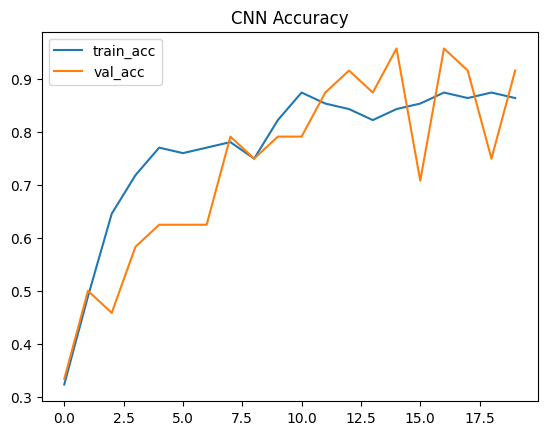

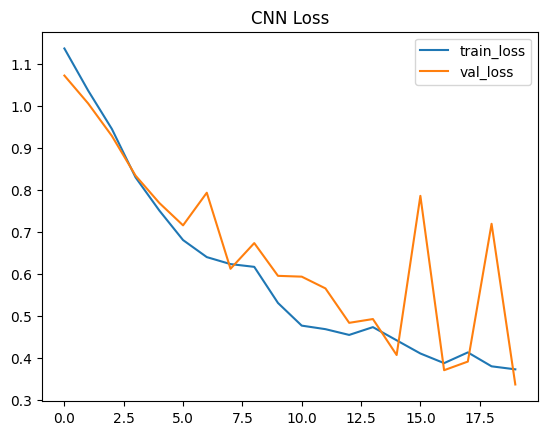

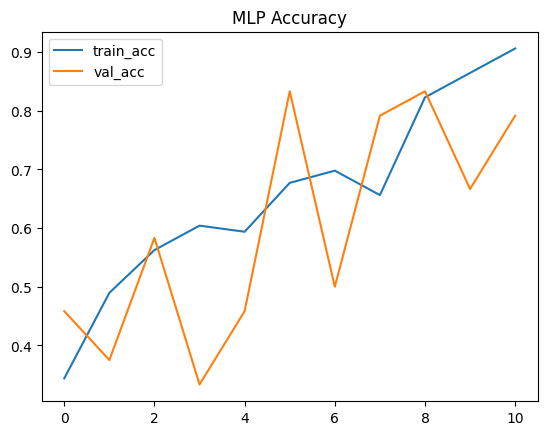

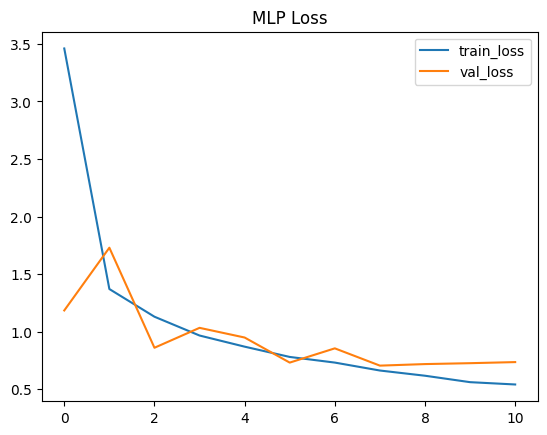

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist, title):
    acc = hist.history["accuracy"]
    val_acc = hist.history["val_accuracy"]
    loss = hist.history["loss"]
    val_loss = hist.history["val_loss"]

    plt.figure()
    plt.plot(acc, label="train_acc")
    plt.plot(val_acc, label="val_acc")
    plt.title(f"{title} Accuracy")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(loss, label="train_loss")
    plt.plot(val_loss, label="val_loss")
    plt.title(f"{title} Loss")
    plt.legend()
    plt.show()

plot_history(history_cnn, "CNN")
plot_history(history_mlp, "MLP")


# Confusion Matrix

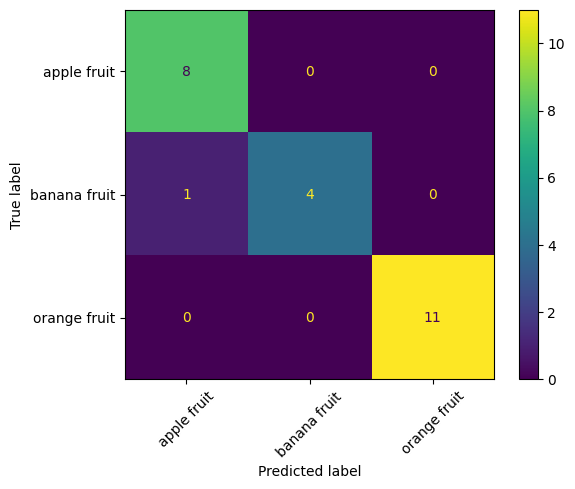

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true, y_pred = [], []

for x_batch, y_batch in val_ds_n:
    preds = cnn_model.predict(x_batch, verbose=0)
    y_true.extend(y_batch.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format='d')
plt.xticks(rotation=45)
plt.show()
